In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report

%matplotlib inline

In [2]:
data = pd.read_csv('audit_data.csv')
data.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [3]:
data.shape

(776, 27)

In [4]:
data.isnull().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [5]:
data['Money_Value'].loc[data['Money_Value'].isnull()]

642   NaN
Name: Money_Value, dtype: float64

In [6]:
mv_mean = data['Money_Value'].mean()

In [7]:
data['Money_Value'].loc[data['Money_Value'].isnull()] = mv_mean

data.isnull().sum()

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       0
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   LOCATION_ID     776 non-null    object 
 2   PARA_A          776 non-null    float64
 3   Score_A         776 non-null    float64
 4   Risk_A          776 non-null    float64
 5   PARA_B          776 non-null    float64
 6   Score_B         776 non-null    float64
 7   Risk_B          776 non-null    float64
 8   TOTAL           776 non-null    float64
 9   numbers         776 non-null    float64
 10  Score_B.1       776 non-null    float64
 11  Risk_C          776 non-null    float64
 12  Money_Value     776 non-null    float64
 13  Score_MV        776 non-null    float64
 14  Risk_D          776 non-null    float64
 15  District_Loss   776 non-null    int64  
 16  PROB            776 non-null    float64
 17  RiSk_E          776 non-null    flo

In [9]:
data.loc[data['LOCATION_ID'] == 'NUH']

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
355,1.99,NUH,0.55,0.2,0.11,0.0,0.2,0.0,0.55,5.0,...,0.4,0,0.2,0.0,2.0,1.644,0.4,0.5,0.3288,0


In [10]:
data.drop('LOCATION_ID', axis = 1, inplace = True)

In [11]:
data.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.0,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,0.223711,...,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.080352,...,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.583500,0.400000,0.5,0.316700,0.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,3.250000,10.663500,0.400000,0.5,3.249900,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,...,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


<AxesSubplot:xlabel='Risk', ylabel='Count'>

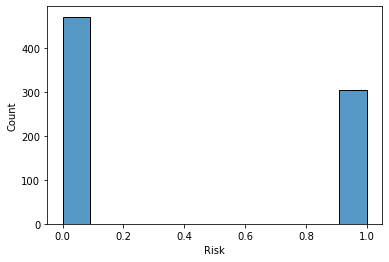

In [12]:
sns.histplot(data.Risk)

In [13]:
data.Risk.value_counts()

0    471
1    305
Name: Risk, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sector_score', ylabel='Density'>

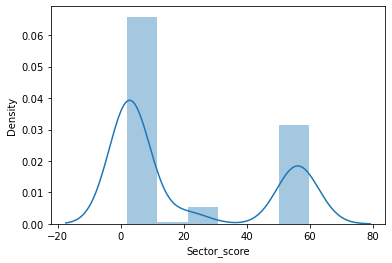

In [14]:
sns.distplot(data['Sector_score'])

<AxesSubplot:xlabel='Sector_score', ylabel='Count'>

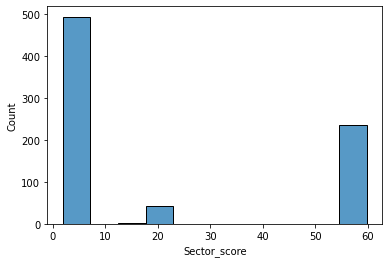

In [15]:
sns.histplot(data['Sector_score'])

In [16]:
data['Sector_score'].value_counts()

55.57    200
3.89     114
1.85      95
2.72      82
3.41      76
2.37      74
1.99      47
21.61     41
59.85     37
2.34       5
15.56      3
2.36       1
17.68      1
Name: Sector_score, dtype: int64

In [17]:
train = data.sample(frac = .8, random_state = 11)
train.head()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
361,1.99,1.62,0.4,0.648,0.00,0.2,0.000,1.62,5.0,0.2,...,1.2,0,0.2,0.0,2.6,2.848,1.2,0.5,1.7088,1
217,2.72,1.73,0.4,0.692,5.64,0.4,2.256,7.37,5.0,0.2,...,0.4,0,0.2,0.0,3.2,12.358,0.4,0.5,2.4716,1
556,59.85,0.00,0.2,0.000,0.00,0.2,0.000,0.00,5.0,0.2,...,0.8,0,0.2,0.0,2.2,2.060,0.8,0.5,0.8240,0
729,55.57,1.19,0.4,0.476,0.00,0.2,0.000,1.19,5.0,0.2,...,0.4,0,0.2,0.0,2.2,1.876,0.4,0.5,0.3752,0
148,3.41,1.10,0.4,0.440,87.71,0.6,52.626,88.81,5.5,0.4,...,0.4,0,0.2,0.0,4.2,76.258,0.4,0.5,15.2516,1


In [18]:
train.shape

(621, 26)

In [19]:
valid = data.drop(train.index)
valid

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
1,3.89,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,0.2,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
10,3.89,5.43,0.6,3.258,10.77,0.6,6.462,16.20,5.0,0.2,...,0.4,0,0.2,0.0,3.6,12.004,0.4,0.5,2.4008,1
15,3.89,1.95,0.4,0.780,9.01,0.4,3.604,10.96,5.0,0.2,...,0.4,0,0.2,0.0,3.0,9.384,0.4,0.5,1.8768,1
18,3.89,1.81,0.4,0.724,1.03,0.2,0.206,2.84,5.0,0.2,...,0.4,0,0.2,0.0,2.2,2.330,0.4,0.5,0.4660,0
19,3.89,4.86,0.6,2.916,46.78,0.6,28.068,51.64,5.5,0.4,...,0.4,0,0.2,0.0,4.4,71.492,0.4,0.5,14.2984,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,55.57,0.00,0.2,0.000,0.00,0.2,0.000,0.00,5.0,0.2,...,0.4,0,0.2,0.0,2.0,1.400,0.4,0.5,0.2800,0
762,55.57,0.59,0.2,0.118,0.00,0.2,0.000,0.59,5.0,0.2,...,0.4,0,0.2,0.0,2.0,1.518,0.4,0.5,0.3036,0
765,55.57,0.00,0.2,0.000,3.30,0.6,1.980,3.30,5.0,0.2,...,0.4,0,0.2,0.0,3.2,3.380,0.4,0.5,0.6760,0
769,55.57,0.51,0.2,0.102,0.50,0.2,0.100,1.01,5.0,0.2,...,0.4,0,0.2,0.0,2.0,1.620,0.4,0.5,0.3240,0


In [20]:
X_train, y_train = train.drop('Risk', axis = 1), train.Risk

X_valid, y_valid = valid.drop('Risk', axis = 1), valid.Risk

In [21]:
X_train.head()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk
361,1.99,1.62,0.4,0.648,0.00,0.2,0.000,1.62,5.0,0.2,...,0.2,1.2,0,0.2,0.0,2.6,2.848,1.2,0.5,1.7088
217,2.72,1.73,0.4,0.692,5.64,0.4,2.256,7.37,5.0,0.2,...,0.2,0.4,0,0.2,0.0,3.2,12.358,0.4,0.5,2.4716
556,59.85,0.00,0.2,0.000,0.00,0.2,0.000,0.00,5.0,0.2,...,0.2,0.8,0,0.2,0.0,2.2,2.060,0.8,0.5,0.8240
729,55.57,1.19,0.4,0.476,0.00,0.2,0.000,1.19,5.0,0.2,...,0.2,0.4,0,0.2,0.0,2.2,1.876,0.4,0.5,0.3752
148,3.41,1.10,0.4,0.440,87.71,0.6,52.626,88.81,5.5,0.4,...,0.2,0.4,0,0.2,0.0,4.2,76.258,0.4,0.5,15.2516


In [22]:
y_train.head()

361    1
217    1
556    0
729    0
148    1
Name: Risk, dtype: int64

## LogisticRegression

In [23]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
preds_lr = model_lr.predict(X_valid)

acc_lr = accuracy_score(y_valid, preds_lr)
print('Accuracy LR: ', acc_lr)
rp_lr = classification_report(y_valid, preds_lr)
print('...........................\nClassification Report\n', rp_lr)

Accuracy LR:  0.9935483870967742
...........................
Classification Report
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        90
           1       0.98      1.00      0.99        65

    accuracy                           0.99       155
   macro avg       0.99      0.99      0.99       155
weighted avg       0.99      0.99      0.99       155



## DecisionTree

In [25]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
preds_dt = model_dt.predict(X_valid)
acc_dt = accuracy_score(y_valid, preds_dt)
print('Accuracy DT: ', acc_dt)
rp_dt = classification_report(y_valid, preds_dt)
print('.........................\nClassification Report: ', rp_dt)

Accuracy DT:  1.0
.........................
Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00        65

    accuracy                           1.00       155
   macro avg       1.00      1.00      1.00       155
weighted avg       1.00      1.00      1.00       155



## KNeighbors

In [27]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [28]:
preds_knn = model_knn.predict(X_valid)
acc_knn = accuracy_score(y_valid, preds_knn)
print('Accuracy KNN: ', acc_knn)
rp_knn = classification_report(y_valid, preds_knn)
print('........................\nClassification Report: \n', rp_knn)

Accuracy KNN:  0.9741935483870968
........................
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        90
           1       1.00      0.94      0.97        65

    accuracy                           0.97       155
   macro avg       0.98      0.97      0.97       155
weighted avg       0.98      0.97      0.97       155



## SupportVector

In [29]:
model_svc = SVC()
model_svc.fit(X_train, y_train)

SVC()

In [30]:
preds_svc = model_svc.predict(X_valid)
acc_svc = accuracy_score(y_valid, preds_svc)
print('Accuracy SVC: ', acc_svc)
rp_svc = classification_report(y_valid, preds_svc)
print('..........................\nClassification Report: \n', rp_svc)

Accuracy SVC:  0.8709677419354839
..........................
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      1.00      0.90        90
           1       1.00      0.69      0.82        65

    accuracy                           0.87       155
   macro avg       0.91      0.85      0.86       155
weighted avg       0.89      0.87      0.87       155

